In [240]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.mlab as mlab

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/.DS_Store
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/index.png
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/Proyecto 1 (posible desecho).ipynb
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/.DS_Store
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/test.csv
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/Proyecto 1.ipynb
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/data_description.txt
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/train.csv
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/sample_submission.csv
/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/.ipynb_checkpoints/Proyecto 1-checkpoint.ipynb
/Us

In [202]:
# Load the data into df (dataframes)

train_all = pd.read_csv("/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/train.csv")

train_y = train_all.iloc[:,-1:]

train = train_all.iloc[:,:-1]

test_all = pd.read_csv("/Users/muon02/Documents/Sem2021/IAeCdD/Proyecto_1/input/house-prices-advanced-regression-techniques/test.csv")

test_y = test_all.iloc[:,-1:]

test = test_all.iloc[:,:-1]

In [128]:
print(train_all.shape,
      test_all.shape)

(1460, 81) (1459, 80)


In [245]:
posible_features = ['YearBuilt','LotFrontage','LotArea','OverallQual','OverallCond',
                    'MasVnrArea','YearRemodAdd','1stFlrSF','2ndFlrSF','OpenPorchSF',
                    '3SsnPorch','LowQualFinSF','BsmtUnfSF','GrLivArea',
                   'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath',
                   'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                   'Fireplaces','GarageYrBlt','GarageCars','GarageArea',
                    'WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                   'MiscVal','MoSold','YrSold','SalePrice']

train_select = train_all[posible_features]

In [170]:
len(posible_features)

34

In [171]:
for feature in train_all.select_dtypes(exclude=[np.dtype('O')]).columns:
    if feature not in posible_features:
        print(feature)

Id
MSSubClass
BsmtFinSF1
BsmtFinSF2


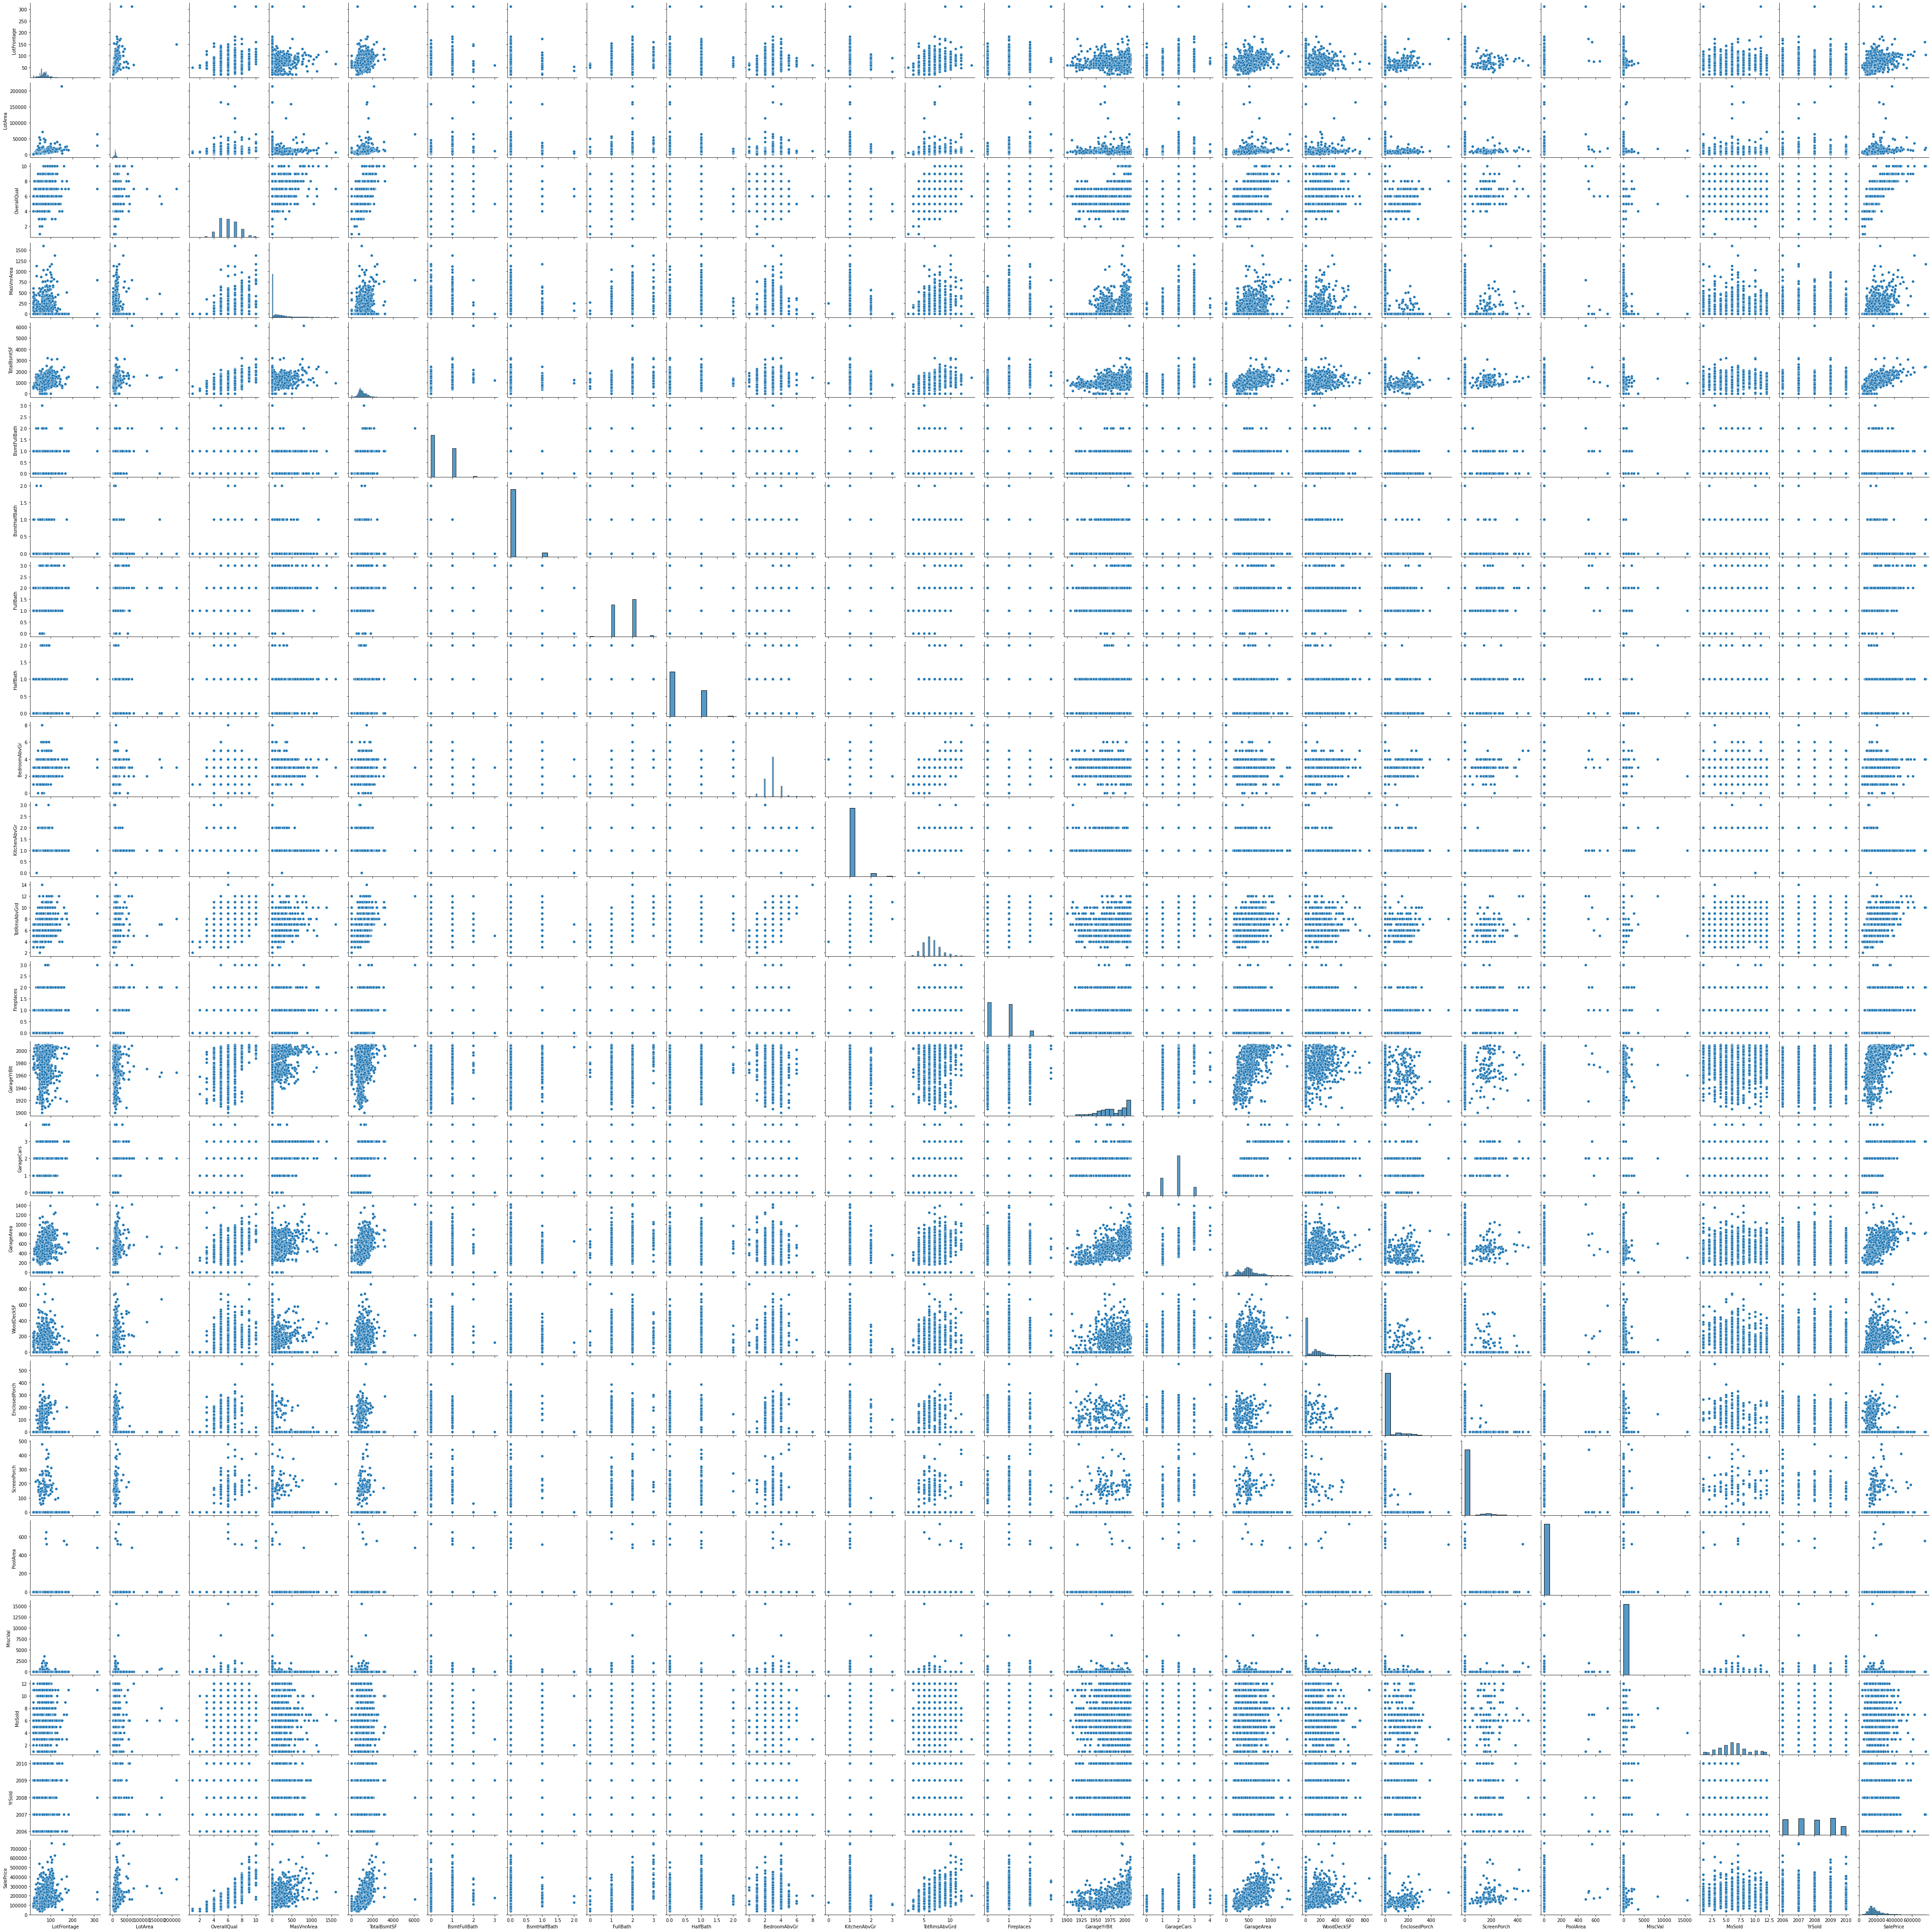

In [55]:
sns.pairplot(data=train_select)

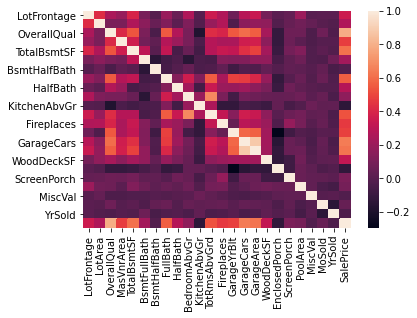

In [57]:
sn.heatmap(train_select.corr(), fmt='g')
plt.show()

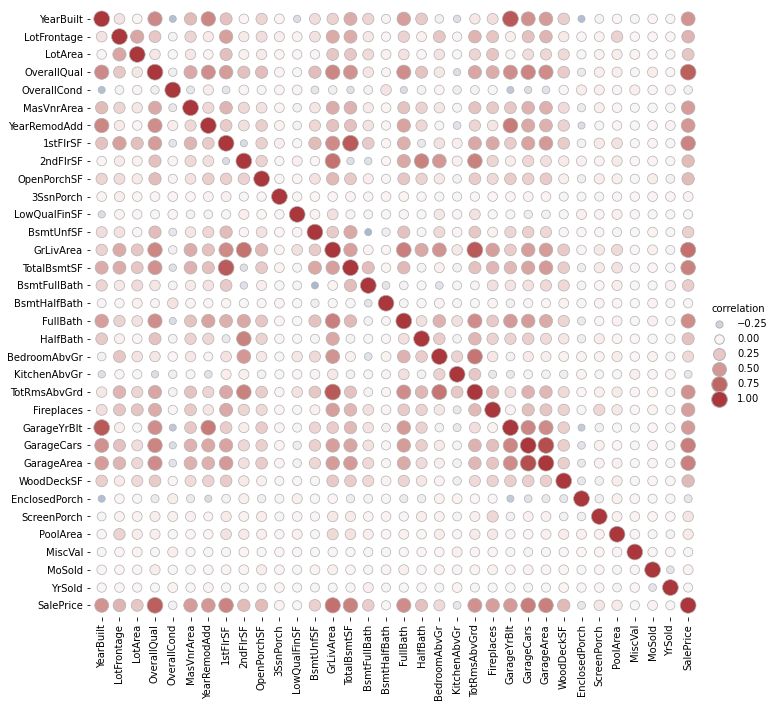

In [190]:
corr_mat = train_select.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [191]:
corr_mat[corr_mat['level_0']=='GarageCars']

,level_0,level_1,correlation
816,GarageCars,YearBuilt,0.537850
817,GarageCars,LotFrontage,0.285691
818,GarageCars,LotArea,0.154871
819,GarageCars,OverallQual,0.600671
820,GarageCars,OverallCond,-0.185758
821,GarageCars,MasVnrArea,0.364204
822,GarageCars,YearRemodAdd,0.420622
823,GarageCars,1stFlrSF,0.439317
824,GarageCars,2ndFlrSF,0.183926
825,GarageCars,OpenPorchSF,0.213569


Veamos como hay variables que no estan correlacionadas con el precio de venta, entonces las descartamos.

In [174]:
posible_features_b_corr = np.array(
    corr_mat[
        corr_mat['level_0']=='SalePrice' #Nos fijamos en como responden con respecto al precio de venta
    ][
        np.abs(corr_mat['correlation'])>=0.25 #Nos fijamos que la coorrelación sea significativa
    ]['level_1']) #Extraemos esos factores

<ipython-input-174-36c9d32e8d0a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_mat[


In [192]:
train_select_corr = train_all[posible_features_b_corr]
train_select_corr = train_select_corr.drop(columns=['GarageCars'])
print(train_select_corr.shape)
train_select_corr.head()

(1460, 19)


,YearBuilt,LotFrontage,LotArea,OverallQual,MasVnrArea,YearRemodAdd,1stFlrSF,2ndFlrSF,OpenPorchSF,GrLivArea,TotalBsmtSF,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,SalePrice
0,2003,65.0,8450,7,196.0,2003,856,854,61,1710,856,2,1,8,0,2003.0,548,0,208500
1,1976,80.0,9600,6,0.0,1976,1262,0,0,1262,1262,2,0,6,1,1976.0,460,298,181500
2,2001,68.0,11250,7,162.0,2002,920,866,42,1786,920,2,1,6,1,2001.0,608,0,223500
3,1915,60.0,9550,7,0.0,1970,961,756,35,1717,756,1,0,7,1,1998.0,642,0,140000
4,2000,84.0,14260,8,350.0,2000,1145,1053,84,2198,1145,2,1,9,1,2000.0,836,192,250000


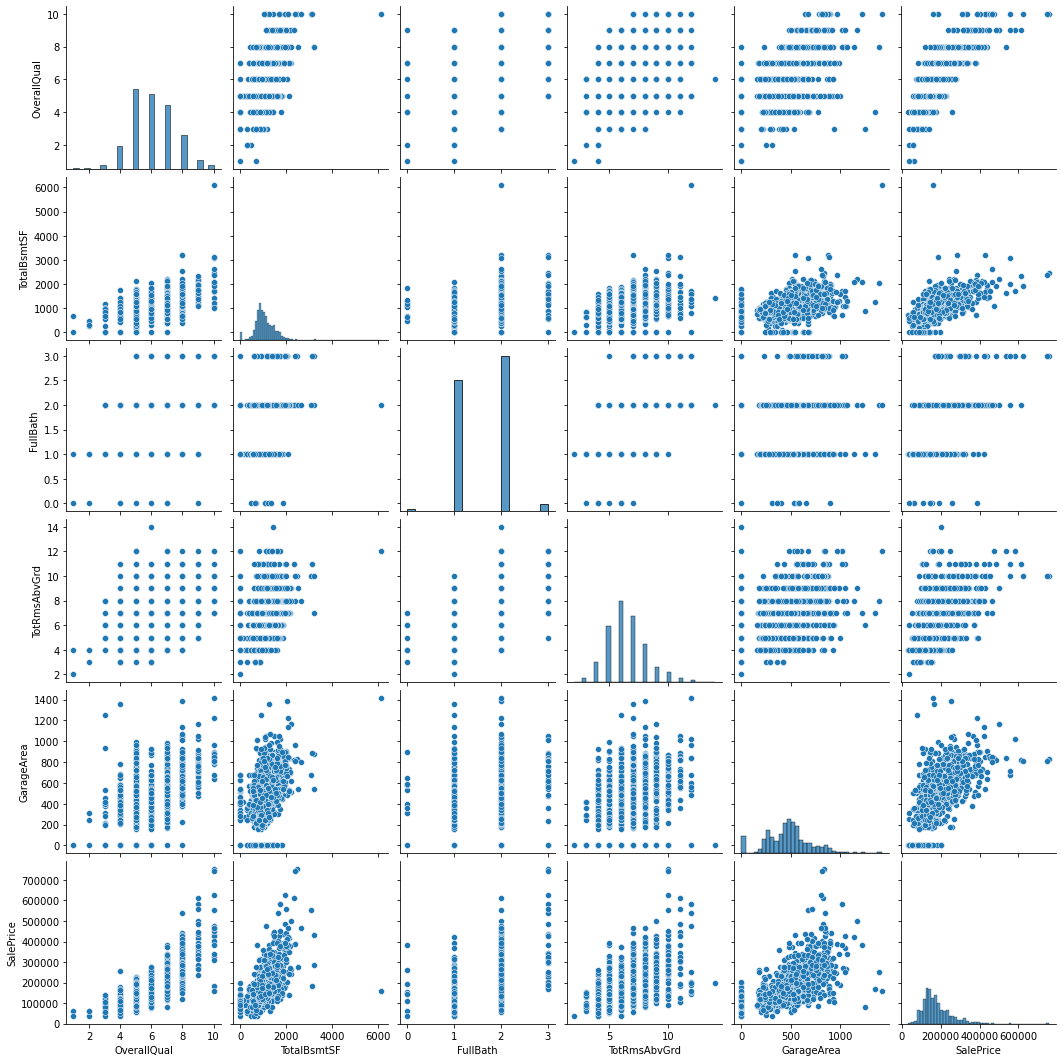

In [88]:
sns.pairplot(data=train_select_corr)

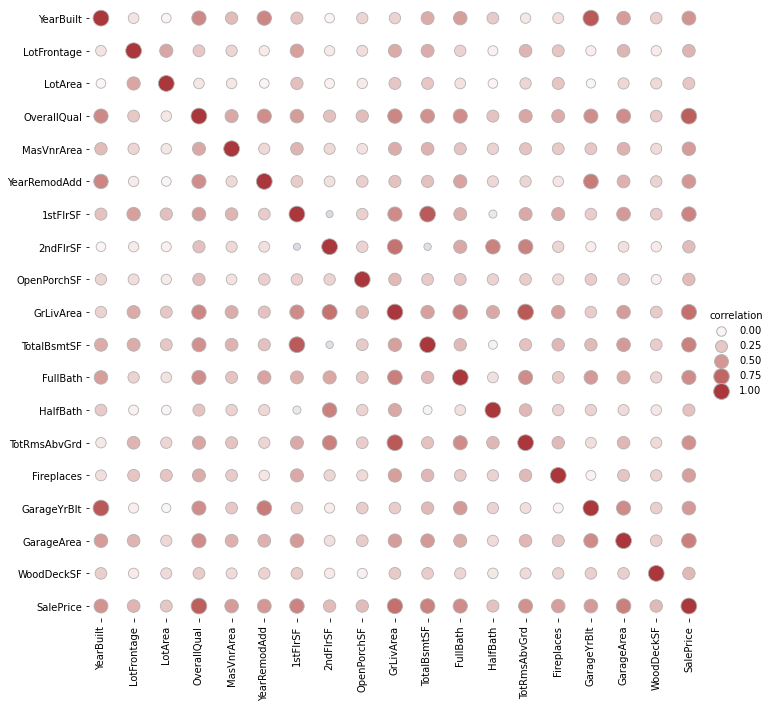

In [176]:
corr_mat = train_select_corr.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [196]:
corr_mat[
    np.abs(corr_mat['correlation'])>0.7
    ]

,level_0,level_1,correlation
0,YearBuilt,YearBuilt,1.000000
23,YearBuilt,GarageYrBlt,0.825667
35,LotFrontage,LotFrontage,1.000000
70,LotArea,LotArea,1.000000
105,OverallQual,OverallQual,1.000000
135,OverallQual,SalePrice,0.790982
140,OverallCond,OverallCond,1.000000
175,MasVnrArea,MasVnrArea,1.000000
210,YearRemodAdd,YearRemodAdd,1.000000
245,1stFlrSF,1stFlrSF,1.000000


In [197]:
train_select_corr_2 = train_select_corr.drop(columns=['GarageYrBlt','TotalBsmtSF',
                                                   'TotRmsAbvGrd'])
print(train_select_corr_2.shape)
train_select_corr_2.head()

(1460, 16)


,YearBuilt,LotFrontage,LotArea,OverallQual,MasVnrArea,YearRemodAdd,1stFlrSF,2ndFlrSF,OpenPorchSF,GrLivArea,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,SalePrice
0,2003,65.0,8450,7,196.0,2003,856,854,61,1710,2,1,0,548,0,208500
1,1976,80.0,9600,6,0.0,1976,1262,0,0,1262,2,0,1,460,298,181500
2,2001,68.0,11250,7,162.0,2002,920,866,42,1786,2,1,1,608,0,223500
3,1915,60.0,9550,7,0.0,1970,961,756,35,1717,1,0,1,642,0,140000
4,2000,84.0,14260,8,350.0,2000,1145,1053,84,2198,2,1,1,836,192,250000


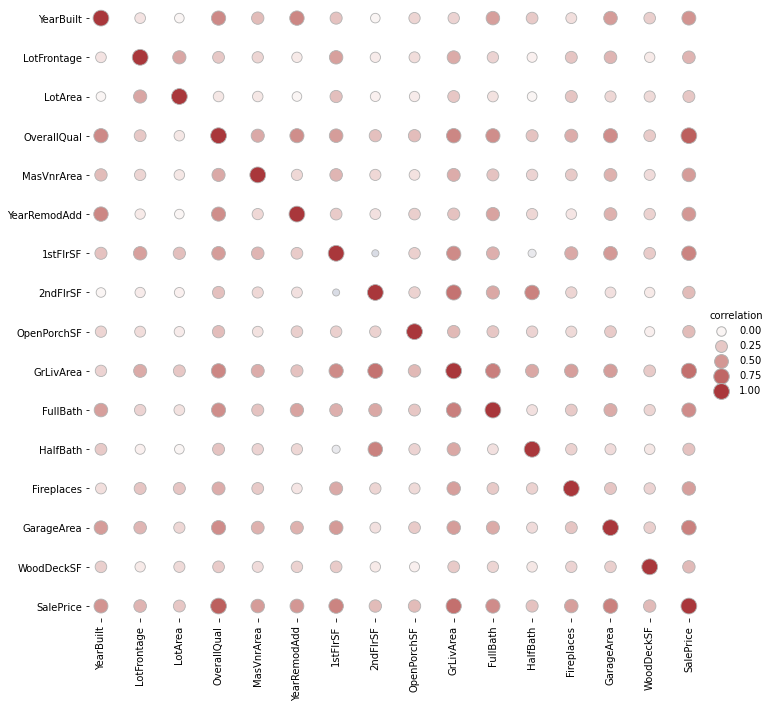

In [198]:
corr_mat = train_select_corr_2.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

## Regresión lineal

In [199]:
train_select_corr=train_select_corr_2.dropna()
simple_linear_reg_X = train_select_corr.drop(columns=['SalePrice'])
simple_linear_reg_Y = train_select_corr[['SalePrice']]

In [200]:
reg = LinearRegression().fit(simple_linear_reg_X, simple_linear_reg_Y)

In [201]:
print(reg.score(simple_linear_reg_X, simple_linear_reg_Y),
      reg.coef_,
      reg.intercept_)

0.784259098218204 [[ 2.33052077e+02 -1.35789861e+01  7.96704252e-01  2.01263259e+04
   4.00028257e+01  3.68680158e+02  3.71539316e+01  1.63266637e+01
   9.22813265e+00  2.15250793e+01 -1.39596480e+03  1.22074971e+03
   9.05728331e+03  3.99410528e+01  3.39315065e+01]] [-1251721.24508111]


In [238]:
y_pred = reg.predict(simple_linear_reg_X)


print('Coefficients: \n', reg.coef_)
print('Interpeto: \n', reg.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(simple_linear_reg_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(simple_linear_reg_Y, y_pred))

Coefficients: 
 [[ 2.33052077e+02 -1.35789861e+01  7.96704252e-01  2.01263259e+04
   4.00028257e+01  3.68680158e+02  3.71539316e+01  1.63266637e+01
   9.22813265e+00  2.15250793e+01 -1.39596480e+03  1.22074971e+03
   9.05728331e+03  3.99410528e+01  3.39315065e+01]]
Interpeto: 
 [-1251721.24508111]
Mean squared error: 1491136187.69
Coefficient of determination: 0.78


In [216]:
y_pred_test = reg.predict(
    test_all[
        np.delete(
            posible_features_b_corr,
            np.where(posible_features_b_corr == 'SalePrice')
        )
    ].drop(
        columns=['GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','GarageCars']
    ).dropna()
)

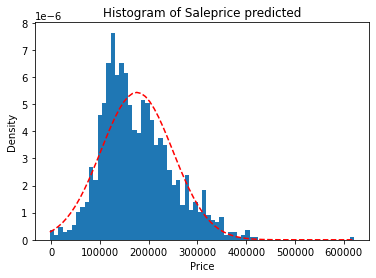

In [236]:
fig, ax = plt.subplots()

n, bins, patches = plt.hist(y_pred_test,70, density=True)

mu = y_pred_test.mean() # mean of result
sigma = y_pred_test.std() # standard deviation of result

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, 'r--')

ax.set_xlabel('Price')
ax.set_ylabel('Density')
ax.set_title(r'Histogram of Saleprice predicted')

plt.show()

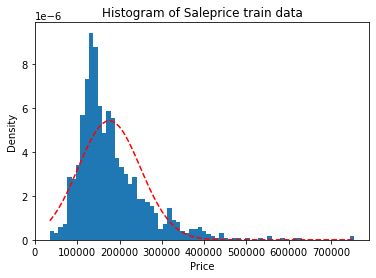

In [235]:
fig, ax = plt.subplots()

n, bins, patches = plt.hist(simple_linear_reg_Y,70, density=True)

mu = y_pred_test.mean() # mean of result
sigma = y_pred_test.std() # standard deviation of result

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, 'r--')

ax.set_xlabel('Price')
ax.set_ylabel('Density')
ax.set_title(r'Histogram of Saleprice train data')

plt.show()

## Si no escogemos las variables...

In [246]:
train_select=train_select.dropna()
simple_linear_reg_X = train_select.drop(columns=['SalePrice'])
simple_linear_reg_Y = train_select[['SalePrice']]

In [247]:
reg2 = LinearRegression().fit(simple_linear_reg_X, simple_linear_reg_Y)

In [248]:
y_pred = reg2.predict(simple_linear_reg_X)


print('Coefficients: \n', reg2.coef_)
print('Interpeto: \n', reg2.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(simple_linear_reg_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(simple_linear_reg_Y, y_pred))

Coefficients: 
 [[ 3.20155164e+02 -2.06992221e+00  5.85107664e-01  1.79810680e+04
   5.60820424e+03  2.98566585e+01  1.40513574e+02  1.75570436e+01
   1.17467712e+01 -3.31334243e+00  3.84515681e+01 -1.57635631e+00
  -1.06767326e+01  2.77274585e+01  1.83818146e+01  7.61937673e+03
   4.55530850e+02  3.76553832e+03 -1.84131852e+03 -8.95187535e+03
  -3.45811425e+04  6.26121434e+03  4.00512000e+03 -8.02646689e+01
   1.71532213e+04  1.07780268e+01  2.27943265e+01  8.12930148e+00
   5.62013274e+01 -7.27810463e+01 -2.01341145e+00 -7.09994987e+01
  -1.93650614e+02]]
Interpeto: 
 [-440330.11164409]
Mean squared error: 1353562310.85
Coefficient of determination: 0.80


## Modelo Lasso

In [241]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(simple_linear_reg_X, simple_linear_reg_Y)

Lasso(alpha=0.5, max_iter=1000000.0, normalize=True)

In [242]:
y_pred = lasso_model.predict(simple_linear_reg_X)


print('Coefficients: \n', lasso_model.coef_)
print('Interpeto: \n', lasso_model.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(simple_linear_reg_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(simple_linear_reg_Y, y_pred))

Coefficients: 
 [ 2.32030337e+02 -1.17187708e+01  7.94024067e-01  2.01329875e+04
  4.00061703e+01  3.67886768e+02  3.57566351e+01  1.48888420e+01
  9.04706031e+00  2.27671784e+01 -1.23530099e+03  1.27894160e+03
  9.05327684e+03  3.99369527e+01  3.39006911e+01]
Interpeto: 
 [-1248296.26626423]
Mean squared error: 1491145748.51
Coefficient of determination: 0.78


# Modelo Ridge

In [243]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(simple_linear_reg_X, simple_linear_reg_Y)

Ridge(alpha=0.5)

In [244]:
y_pred = ridge_model.predict(simple_linear_reg_X)


print('Coefficients: \n', ridge_model.coef_)
print('Interpeto: \n', ridge_model.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(simple_linear_reg_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(simple_linear_reg_Y, y_pred))

Coefficients: 
 [[ 2.33173568e+02 -1.36032800e+01  7.96773539e-01  2.01157253e+04
   4.00110908e+01  3.68790443e+02  3.71667837e+01  1.63340880e+01
   9.24138485e+00  2.15300337e+01 -1.39282985e+03  1.21964060e+03
   9.04780064e+03  3.99495969e+01  3.39357498e+01]]
Interpeto: 
 [-1252143.58861523]
Mean squared error: 1491136315.17
Coefficient of determination: 0.78


### Que hubiera pasado si aún le muevo menos

In [121]:
train_all=train_all.dropna()
simple_linear_reg_X = train_all.drop(columns=['SalePrice'])
simple_linear_reg_Y = train_all[['SalePrice']]

reg = LinearRegression().fit(simple_linear_reg_X, simple_linear_reg_Y)

print(reg.score(simple_linear_reg_X, simple_linear_reg_Y),
      reg.coef_,
      reg.intercept_)

ValueError: Found array with 0 sample(s) (shape=(0, 80)) while a minimum of 1 is required.

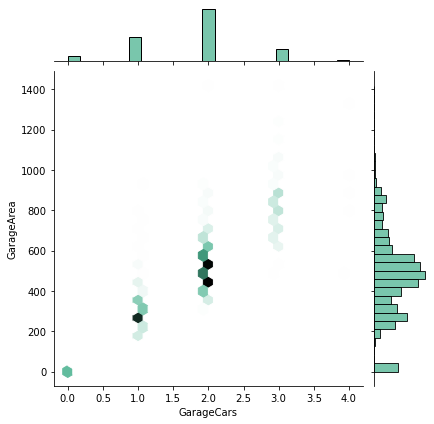

In [63]:
sns.jointplot(x='GarageCars', y='GarageArea', data=train_select, kind="hex", color="#4CB391")

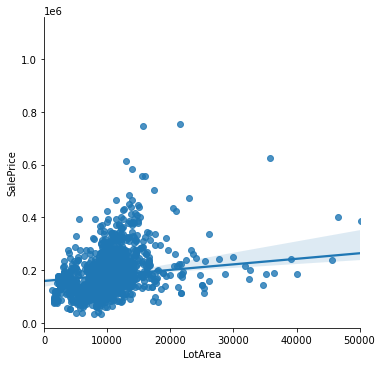

In [73]:
g = sns.lmplot(x="LotArea", y="SalePrice", data=train_select,
               y_jitter=.02, logx=False, truncate=False)
g.set(xlim=(0,5e4))

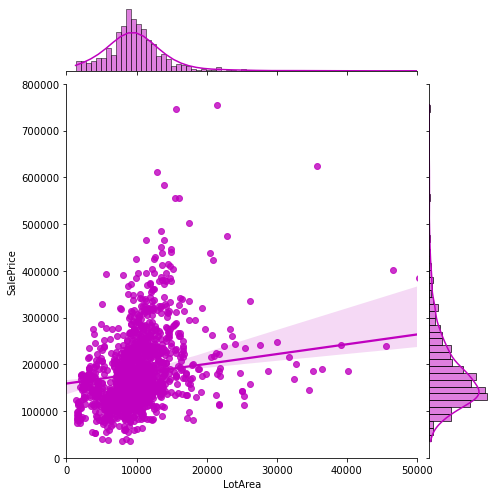

In [75]:
g = sns.jointplot(x="LotArea", y="SalePrice", data=train_select,
                  kind="reg", truncate=False,
                  xlim=(0, 5e4), ylim=(0, 0.8e6),
                  color="m", height=7)

In [30]:
train_all[['GarageArea','GarageCars']].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000
